In [4]:
# import libraries we will work with today

import pandas as pd
from scipy.stats import ttest_ind
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [5]:
# read cleaned data

ceo_data = pd.read_excel("../data/cleaned/CEO_data_cleaned.xlsx")

In [6]:
# preview data
# if you see an unamed column, there was a mistake when saving the data 
# add index = False to the to_excel function

ceo_data.head()

,Annual Report Year,Sector,Company Name,Company Ticker,Company Index,Individual Name,Individual Role,Time in Role,Age (Yrs),Number of Qualifications,...,Salary,Bonus,D.C Pension,Other,Total Salary+Bonus,Total Inc. D.C. Pension & Other,Total Equity Linked Compensation,Total Annual Compensation,Liquid Wealth,Total Wealth
0,2009-01-01,General Retailers,TED BAKER PLC,TED,FTSE 250(GBP),Raymond (Ray) Stuart Kelvin,CEO,21.0,53.0,0,...,272,0.0,NaN,11.0,272,283,721.0,993,57467.0,58514.0
1,2009-01-01,General Retailers,NEXT PLC,NXT,FTSE 100 (GBP),Lord (Simon Adam) Wolfson of Aspley Guise,CEO,7.4,41.0,2,...,675,123.0,NaN,33.0,798,831,1581.0,2379,17597.0,19531.0
2,2009-01-01,Engineering & Machinery,MORGAN ADVANCED MATERIALS PLC (Morgan Crucible...,MGAM,FTSE 250(GBP),Mark Robertshaw,CEO,2.4,40.0,1,...,440,264.0,108.0,13.0,704,825,781.0,1485,405.0,2666.0
3,2009-01-01,General Retailers,KINGFISHER PLC,KGF,FTSE 100 (GBP),Sir Ian Michael Cheshire,Group CEO,1.0,49.0,2,...,800,802.0,205.0,35.0,1602,1842,35.0,1637,522.0,4733.0
4,2009-01-01,General Retailers,JD SPORTS FASHION PLC (John David Group prior ...,JD.,FTSE 250(GBP),Barry Colin Bown,CEO,8.5,47.0,0,...,283,285.0,22.0,301.0,568,891,NaN,568,12.0,260.0


In [7]:
pd.set_option('display.max_columns', 500) # you can use this to view all columns

ceo_data.head()

,Annual Report Year,Sector,Company Name,Company Ticker,Company Index,Individual Name,Individual Role,Time in Role,Age (Yrs),Number of Qualifications,Gender,Nationality Mix,Salary,Bonus,D.C Pension,Other,Total Salary+Bonus,Total Inc. D.C. Pension & Other,Total Equity Linked Compensation,Total Annual Compensation,Liquid Wealth,Total Wealth
0,2009-01-01,General Retailers,TED BAKER PLC,TED,FTSE 250(GBP),Raymond (Ray) Stuart Kelvin,CEO,21.0,53.0,0,M,British,272,0.0,NaN,11.0,272,283,721.0,993,57467.0,58514.0
1,2009-01-01,General Retailers,NEXT PLC,NXT,FTSE 100 (GBP),Lord (Simon Adam) Wolfson of Aspley Guise,CEO,7.4,41.0,2,M,British,675,123.0,NaN,33.0,798,831,1581.0,2379,17597.0,19531.0
2,2009-01-01,Engineering & Machinery,MORGAN ADVANCED MATERIALS PLC (Morgan Crucible...,MGAM,FTSE 250(GBP),Mark Robertshaw,CEO,2.4,40.0,1,M,British,440,264.0,108.0,13.0,704,825,781.0,1485,405.0,2666.0
3,2009-01-01,General Retailers,KINGFISHER PLC,KGF,FTSE 100 (GBP),Sir Ian Michael Cheshire,Group CEO,1.0,49.0,2,M,British,800,802.0,205.0,35.0,1602,1842,35.0,1637,522.0,4733.0
4,2009-01-01,General Retailers,JD SPORTS FASHION PLC (John David Group prior ...,JD.,FTSE 250(GBP),Barry Colin Bown,CEO,8.5,47.0,0,M,British,283,285.0,22.0,301.0,568,891,NaN,568,12.0,260.0


In [8]:
# remind yourself... how big is the data set

ceo_data.shape

(1816, 22)

In [9]:
# remind yourself the different fields in the data sets

ceo_data.info()

# Let's start by exploring the variables with data type object and datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Annual Report Year                 1816 non-null   datetime64[ns]
 1   Sector                             1816 non-null   object        
 2   Company Name                       1816 non-null   object        
 3   Company Ticker                     1816 non-null   object        
 4   Company Index                      1816 non-null   object        
 5   Individual Name                    1816 non-null   object        
 6   Individual Role                    1816 non-null   object        
 7   Time in Role                       1816 non-null   float64       
 8   Age (Yrs)                          1811 non-null   float64       
 9   Number of Qualifications           1816 non-null   int64         
 10  Gender                             1

### Hypothesis Testing

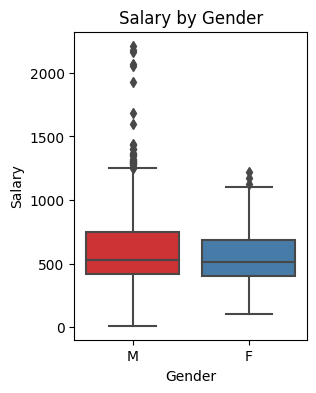

In [10]:
import seaborn as sns

# How does Salary vary by gender?
plt.figure(figsize=(3, 4))
sns.boxplot(x="Gender", y="Salary", data=ceo_data, palette="Set1")
plt.title("Salary by Gender");

# what conclusions can you draw?

Summarise what this plot is showing
- ????

In [53]:
# Define the Hypothesis
# H0: There is no significant difference in salaries amongst genders
# HA: There is a significant difference in salaries amongst genders

# Use a two tailed T-test to compare means of two groups
# Create two indepdent samples 
male_sample = ceo_data[ceo_data.Gender == "M"].Salary
female_sample = ceo_data[ceo_data.Gender == "F"].Salary

In [56]:
# conduct the test 
t_stat, p_value = ttest_ind(male_sample, female_sample)
print("T-statistic value: ", t_stat)  
print("P-Value: ", p_value)

# For the null hypothesis, 
# assuming a significance level of 90% 
# (i.e. alpa is 10%)
# Reject the null hypothesis if p-value <= alpha
# Fail to reject the null hypothesis if p-value > alpha

T-statistic value:  1.0891468456410585
P-Value:  0.27623380360779776


In [57]:
confidence_level = 0.90
significance_level = 1 - confidence_level

if p_value > significance_level:
    print(f"Fail to reject the null hypothesis at {confidence_level*100}%")
else:
    print(f"Reject the null hypothesis at {confidence_level*100}%")

Fail to reject the null hypothesis at 90.0%


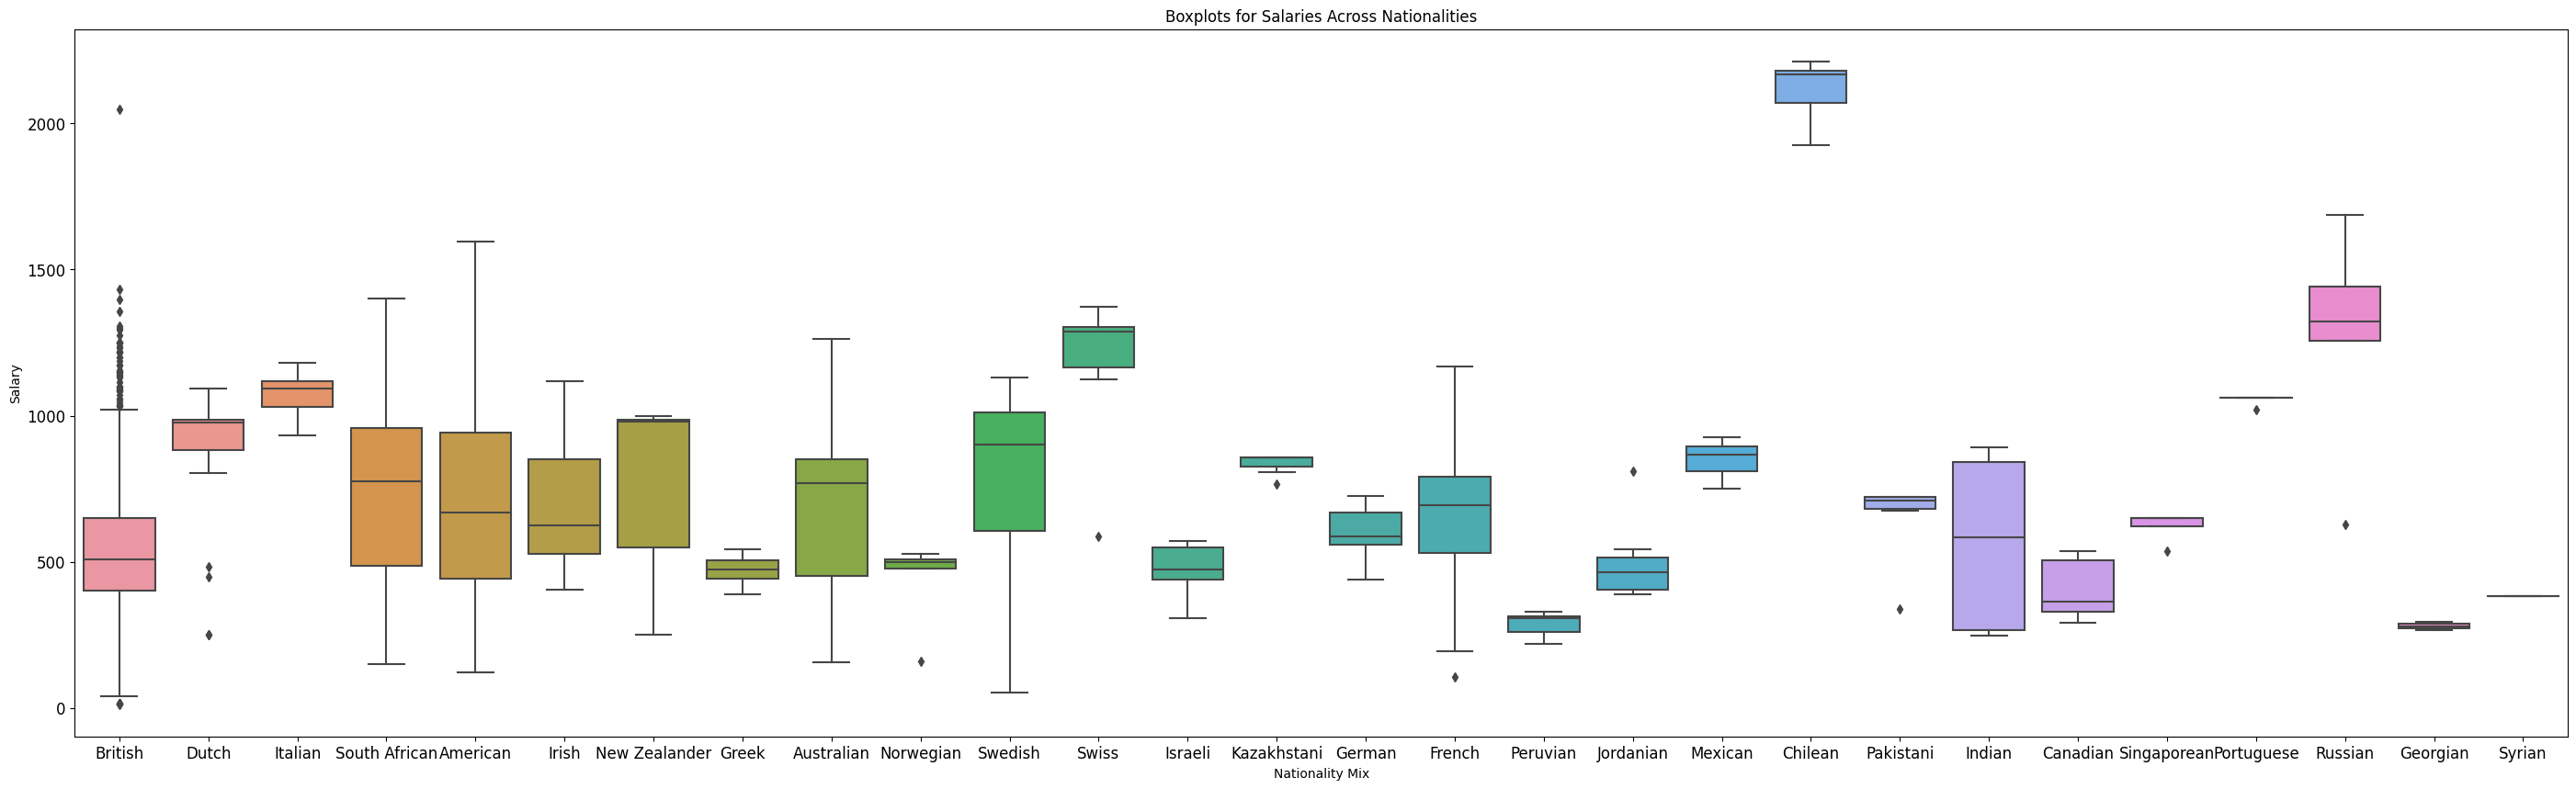

In [58]:
plt.figure(figsize=(35, 10))
sns.boxplot(y="Salary", x="Nationality Mix", data=ceo_data)
plt.tick_params(labelsize=12, rotation=0)
plt.title("Boxplots for Salaries Across Nationalities");

In [59]:
# Frame: a Hypothesis Test 

# Ho: There is no difference in the salary of the Chilean CEO and British CEO
# Ha: There is a difference...

chile_sample = ceo_data[ceo_data["Nationality Mix"] == "Chilean"].Salary
british_sample = ceo_data[ceo_data["Nationality Mix"] == "British"].Salary

In [60]:
chile_sample.shape

(5,)

In [61]:
british_sample.shape

(1308,)

In [65]:
# conduct the test 
t_stat, p_value = ttest_ind(chile_sample, british_sample)
# print("T-statistic value: ", t_stat)  
# print("P-Value: ", p_value)

confidence_level = 0.99
significance_level = 1 - confidence_interval

if p_value > significance_level:
    print(f"Fail to reject the null hypothesis at {confidence_level*100}%")
else:
    print(f"Reject the null hypothesis at {confidence_level*100}%")

Reject the null hypothesis at 99.0%


In [74]:
# Ho: There is no difference in the salary of between age groups
# Ha: There is a difference...

age_30s = ceo_data[ceo_data["Age (Yrs)"].between(30, 40)].Salary
age_40s = ceo_data[ceo_data["Age (Yrs)"].between(41, 50)].Salary

# conduct the test 
t_stat, p_value = ttest_ind(age_30s, age_40s)
# print("T-statistic value: ", t_stat)  
# print("P-Value: ", p_value)

confidence_level = 0.99
significance_level = 1 - confidence_level

if p_value > significance_level:
    print(f"Fail to reject the null hypothesis at {confidence_level*100}%")
else:
    print(f"Reject the null hypothesis at {confidence_level*100}%")

Reject the null hypothesis at 99.0%


### Linear Regression

In [10]:
# before continuing, firstly we keep all the numerical data in order to continue

ceo_data_numerical = ceo_data.select_dtypes(["int64", "float64"])
ceo_data_numerical


,Time in Role,Age (Yrs),Number of Qualifications,Salary,Bonus,D.C Pension,Other,Total Salary+Bonus,Total Inc. D.C. Pension & Other,Total Equity Linked Compensation,Total Annual Compensation,Liquid Wealth,Total Wealth
0,21.0,53.0,0,272,0.0,NaN,11.0,272,283,721.0,993,57467.0,58514.0
1,7.4,41.0,2,675,123.0,NaN,33.0,798,831,1581.0,2379,17597.0,19531.0
2,2.4,40.0,1,440,264.0,108.0,13.0,704,825,781.0,1485,405.0,2666.0
3,1.0,49.0,2,800,802.0,205.0,35.0,1602,1842,35.0,1637,522.0,4733.0
4,8.5,47.0,0,283,285.0,22.0,301.0,568,891,NaN,568,12.0,260.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1811,9.2,57.0,4,954,0.0,207.0,53.0,954,1214,1026.0,1980,8474.0,11364.0
1812,0.9,51.0,3,750,0.0,225.0,518.0,750,1493,2442.0,3192,NaN,2442.0
1813,16.9,57.0,2,397,0.0,NaN,0.0,397,398,NaN,397,542584.0,542584.0
1814,2.3,53.0,2,475,0.0,71.0,43.0,475,589,553.0,1028,NaN,2855.0


In [11]:
# fix missing data

ceo_data_numerical.isnull().sum()

Time in Role                           0
Age (Yrs)                              5
Number of Qualifications               0
Salary                                 0
Bonus                                 23
D.C Pension                          477
Other                                 52
Total Salary+Bonus                     0
Total Inc. D.C. Pension & Other        0
Total Equity Linked Compensation     271
Total Annual Compensation              0
Liquid Wealth                        111
Total Wealth                          32
dtype: int64

In [12]:
ceo_data_numerical.fillna(0, inplace = True)

In [13]:
ceo_data_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Time in Role                       1816 non-null   float64
 1   Age (Yrs)                          1816 non-null   float64
 2   Number of Qualifications           1816 non-null   int64  
 3   Salary                             1816 non-null   int64  
 4   Bonus                              1816 non-null   float64
 5   D.C Pension                        1816 non-null   float64
 6   Other                              1816 non-null   float64
 7   Total Salary+Bonus                 1816 non-null   int64  
 8   Total Inc. D.C. Pension & Other    1816 non-null   int64  
 9   Total Equity Linked Compensation   1816 non-null   float64
 10  Total Annual Compensation          1816 non-null   int64  
 11  Liquid Wealth                      1816 non-null   float

In [14]:
# remove highly correlated features

# plot a correlation plot and identify features to drop

In [15]:
import numpy as np

def identify_highly_correlated_features(df, correlation_threshold):
    """
    This definition can be used to identify highly correlated features
    
    @param df pandas DataFrame
    @param correlation_threshold int 
    
    @return a DataFrame with highly correlated features 
    """
    
    corr_matrix = df.corr(numeric_only = True).abs() # calculate the correlation matrix with 
    high_corr_var = np.where(corr_matrix >= correlation_threshold) # identify variables that have correlations above defined threshold
    high_corr_var = [(corr_matrix.index[x], corr_matrix.columns[y], round(corr_matrix.iloc[x, y], 2))
                         for x, y in zip(*high_corr_var) if x != y and x < y] # identify pairs of highly correlated variables
    
    high_corr_var_df = pd.DataFrame(high_corr_var).rename(columns = {0: 'corr_feature',
                                                                     1: 'drop_feature',
                                                                     2: 'correlation_values'})

    
    if high_corr_var_df.empty:
        high_corr_var_df
    else:
        high_corr_var_df = high_corr_var_df.sort_values(by = 'correlation_values', ascending = False)

    return high_corr_var_df

In [16]:
identify_highly_correlated_features(ceo_data_numerical, correlation_threshold = 0.8)

,corr_feature,drop_feature,correlation_values
3,Liquid Wealth,Total Wealth,1.00
2,Total Equity Linked Compensation,Total Annual Compensation,0.97
0,Bonus,Total Salary+Bonus,0.95
1,Other,Total Inc. D.C. Pension & Other,0.89


In [17]:
list(ceo_data_numerical)

['Time in Role',
 'Age (Yrs)',
 'Number of Qualifications',
 'Salary',
 'Bonus',
 'D.C Pension',
 'Other',
 'Total Salary+Bonus',
 'Total Inc. D.C. Pension & Other',
 'Total Equity Linked Compensation ',
 'Total Annual Compensation ',
 'Liquid Wealth',
 'Total Wealth']

In [18]:
# drop features 

ceo_data_numerical.drop(["Liquid Wealth", "Total Equity Linked Compensation ", "Bonus", "Other"], axis = 1, inplace = True)

In [19]:
list(ceo_data_numerical)

['Time in Role',
 'Age (Yrs)',
 'Number of Qualifications',
 'Salary',
 'D.C Pension',
 'Total Salary+Bonus',
 'Total Inc. D.C. Pension & Other',
 'Total Annual Compensation ',
 'Total Wealth']

In [20]:
# check the 

In [21]:
features = ceo_data_numerical[['Time in Role',
                              'Age (Yrs)',
                              'Number of Qualifications',
                              'D.C Pension',
                              'Total Wealth']]

target = ceo_data_numerical['Salary']
features = sm.add_constant(features)

model = sm.OLS(target, features).fit()
predictions = model.predict(features) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     53.08
Date:                Mon, 08 May 2023   Prob (F-statistic):           1.57e-51
Time:                        01:36:49   Log-Likelihood:                -12626.
No. Observations:                1816   AIC:                         2.526e+04
Df Residuals:                    1810   BIC:                         2.530e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [22]:
# How do you interpret the results

#  Adjusted. R-squared reflects the fit of the model. R-squared values range from 0 to 1, 
# where a higher value generally indicates a better fit, assuming certain conditions are met.

# https://datatofish.com/statsmodels-linear-regression/


### Feature Importance Plot

In [23]:
# split the data into train and test set

X_train, X_test, y_train, y_test = train_test_split(
                                                features, 
                                                target,
                                                test_size = 0.3, 
                                                random_state = 8)


# Build a XGBoost

xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

In [24]:
def feature_importance_plot(model, X_train, n):
    """Plots feature importance - this only works for Random Forest and XGBoost Models

    @param model - the trained model
    @param X_train dataframe - the training dataset
    @param n int - the number of features we are interested in plotting
    
    @return a plot with the Top n features
    """
    
    plt.figure(figsize=(8, 5)) # set figure size
    feat_importances = pd.Series(model.feature_importances_,
                                 index = X_train.columns)
    feat_importances.nlargest(n).plot(kind = 'bar')
    plt.title(f"Top {n} Features")
    plt.show()

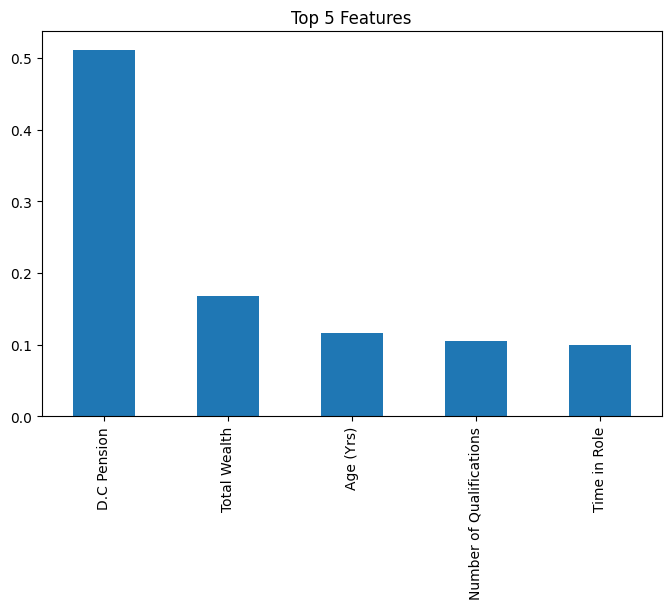

In [25]:
feature_importance_plot(xgb, X_train, n=5)